In [1]:
import os
import numpy as np
import h5py
import glob
import itertools
import sys
from sklearn.utils import shuffle

In [2]:
# the data file is here https://cernbox.cern.ch/index.php/s/uw6z7ZvaqoYZXZ5
# you need to copy it to /data

In [3]:
X = np.array([])
Y = np.array([])
i = 0
fileIN = "data/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND_List.h5" 
f = h5py.File(fileIN, 'r')
X = np.array(f.get("X_val"), dtype=np.float32)
Y = np.array(f.get("Y_val"), dtype=np.float32)
print(X.shape, Y.shape)

(991824, 100, 6, 1) (991824,)


# Custom Loss

In [5]:
# load the model
from keras.models import model_from_json
# read encoder
json_file = open("models/EMD_Dense.json", 'r')
encoder_json = json_file.read()
json_file.close()
model = model_from_json(encoder_json)
model.load_weights("models/EMD_Dense.h5")

model.compile(optimizer='adam', loss='mse', metrics=['acc'])
model.summary()
Yhat = model.predict(X)

(991824, 100, 6, 1)


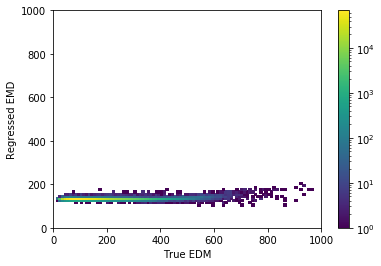

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
# compare prediction to true value
plt.hist2d(Y, Yhat[:,0], bins=100, range=[[0.,1000],[0.,1000]], norm=LogNorm())
plt.colorbar()
plt.ylabel('Regressed EMD')
plt.xlabel('True EDM')
plt.show()

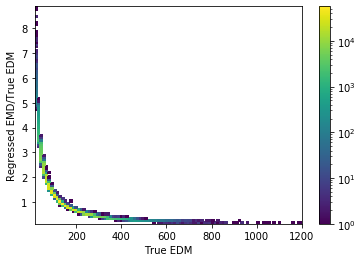

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
# compare prediction to true value
plt.hist2d(Y, Yhat[:,0]/Y, bins=100, norm=LogNorm())
plt.colorbar()
plt.ylabel('Regressed EMD/True EDM')
plt.xlabel('True EDM')
plt.show()

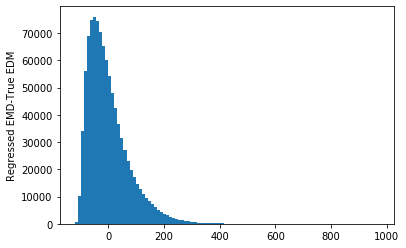

In [11]:
# compare prediction to true value
plt.hist(Y-Yhat[:,0], bins=100)
plt.ylabel('Regressed EMD-True EDM')
plt.show()

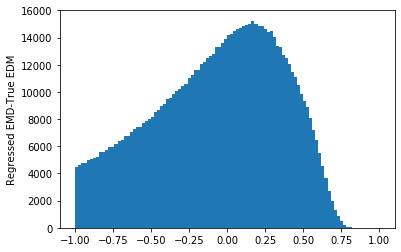

ABSOLUTE: (0.376241 $\pm$ 74.624359) GeV
RELATIVE: -0.329056 $\pm$ 0.751866


In [12]:
import math
# compare prediction to true value
plt.hist((Y-Yhat[:,0])/Y, bins=100, range=[-1., 1.])
plt.ylabel('Regressed EMD-True EDM')
plt.show()
print("ABSOLUTE: (%f $\pm$ %f) GeV" %(np.mean(Y-Yhat[:,0]), np.sqrt(np.var(Y-Yhat[:,0]))))
rel = (Y-Yhat[:,0])/Y
varRel = math.sqrt(np.var(rel))
print("RELATIVE: %f $\pm$ %f" %(np.mean(rel), varRel))

# MSE 

In [32]:
# load the model
from keras.models import model_from_json
# read encoder
json_file = open("models/EMD_Dense_MSE.json", 'r')
encoder_json = json_file.read()
json_file.close()
model = model_from_json(encoder_json)
model.load_weights("models/EMD_Dense_MSE.h5")

In [33]:
model.compile(optimizer='adam', loss='mse', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 6, 1)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 6, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 6, 1)          6010      
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 6, 1)          4         
_________________________________________________________________
activation_1 (Activation)    (None, 10, 6, 1)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 6, 1)           505       
_________________________________________________________________
batch_normalization_3 (Batch (None, 5, 6, 1)           4         
__________

In [34]:
Yhat = model.predict(X)

In [35]:
print(Y.shape)

(991824,)


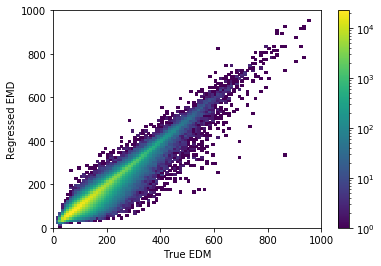

In [36]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
# compare prediction to true value
plt.hist2d(Y, Yhat[:,0], bins=100, range=[[0.,1000],[0.,1000]], norm=LogNorm())
plt.colorbar()
plt.ylabel('Regressed EMD')
plt.xlabel('True EDM')
plt.show()

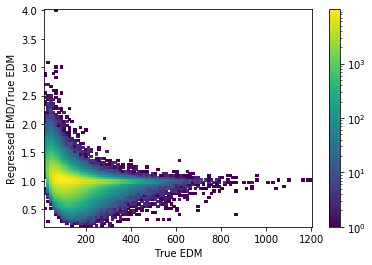

In [37]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
# compare prediction to true value
plt.hist2d(Y, Yhat[:,0]/Y, bins=100, norm=LogNorm())
plt.colorbar()
plt.ylabel('Regressed EMD/True EDM')
plt.xlabel('True EDM')
plt.show()

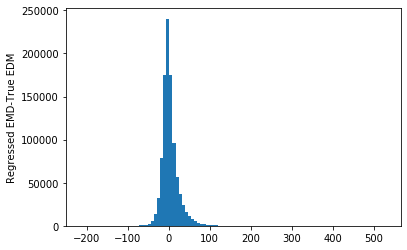

In [38]:
# compare prediction to true value
plt.hist(Y-Yhat[:,0], bins=100)
plt.ylabel('Regressed EMD-True EDM')
plt.show()

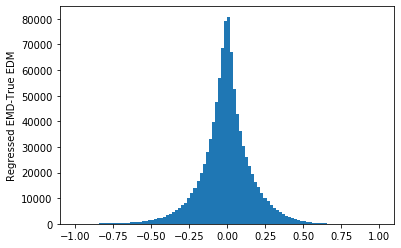

ABSOLUTE: (2.86 +/- 20.17) GeV
RELATIVE: -0.006 +/- 0.167


In [39]:
import math
# compare prediction to true value
plt.hist((Y-Yhat[:,0])/Y, bins=100, range=[-1., 1.])
plt.ylabel('Regressed EMD-True EDM')
plt.show()
print("ABSOLUTE: (%.2f +/- %.2f) GeV" %(np.mean(Y-Yhat[:,0]), np.sqrt(np.var(Y-Yhat[:,0]))))
rel = (Y-Yhat[:,0])/Y
varRel = math.sqrt(np.var(rel))
print("RELATIVE: %.3f +/- %.3f" %(np.mean(rel), varRel))

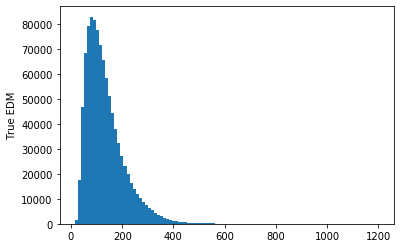

(133.594574 $\pm$ 74.754921) GeV


In [22]:
# compare prediction to true value
plt.hist(Y, bins=100)
plt.ylabel('True EDM')
plt.show()
print("(%f $\pm$ %f) GeV" %(np.mean(Y), np.sqrt(np.var(Y))))

# MAE

In [23]:
# load the model
from keras.models import model_from_json
# read encoder
json_file = open("models/EMD_Dense_MAE.json", 'r')
encoder_json = json_file.read()
json_file.close()
model = model_from_json(encoder_json)
model.load_weights("models/EMD_Dense_MAE.h5")

In [24]:
model.compile(optimizer='adam', loss='mae', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 6, 1)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 6, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 6, 1)          6010      
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 6, 1)          4         
_________________________________________________________________
activation_1 (Activation)    (None, 10, 6, 1)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 6, 1)           505       
_________________________________________________________________
batch_normalization_3 (Batch (None, 5, 6, 1)           4         
__________

In [25]:
Yhat = model.predict(X)

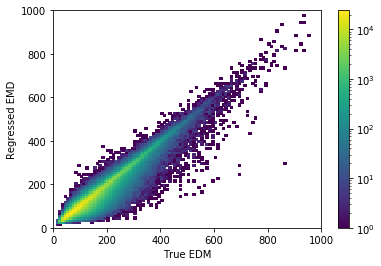

In [26]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
# compare prediction to true value
plt.hist2d(Y, Yhat[:,0], bins=100, range=[[0.,1000],[0.,1000]], norm=LogNorm())
plt.colorbar()
plt.ylabel('Regressed EMD')
plt.xlabel('True EDM')
plt.show()

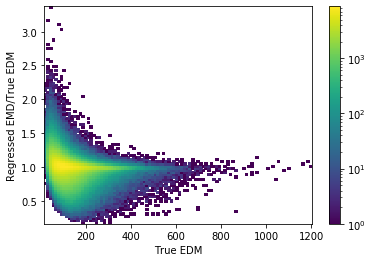

In [27]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
# compare prediction to true value
plt.hist2d(Y, Yhat[:,0]/Y, bins=100, norm=LogNorm())
plt.colorbar()
plt.ylabel('Regressed EMD/True EDM')
plt.xlabel('True EDM')
plt.show()

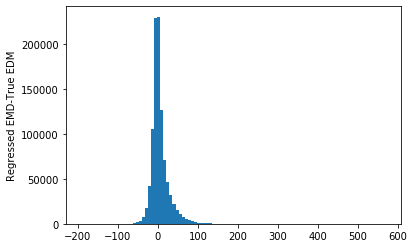

In [28]:
# compare prediction to true value
plt.hist(Y-Yhat[:,0], bins=100)
plt.ylabel('Regressed EMD-True EDM')
plt.show()

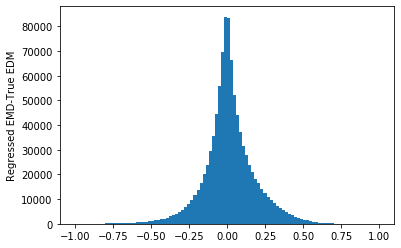

ABSOLUTE: (5.136188 $\pm$ 21.678022) GeV
RELATIVE: 0.015429 $\pm$ 0.168394


In [29]:
import math
# compare prediction to true value
plt.hist((Y-Yhat[:,0])/Y, bins=100, range=[-1., 1.])
plt.ylabel('Regressed EMD-True EDM')
plt.show()
print("ABSOLUTE: (%f $\pm$ %f) GeV" %(np.mean(Y-Yhat[:,0]), np.sqrt(np.var(Y-Yhat[:,0]))))
rel = (Y-Yhat[:,0])/Y
varRel = math.sqrt(np.var(rel))
print("RELATIVE: %f $\pm$ %f" %(np.mean(rel), varRel))

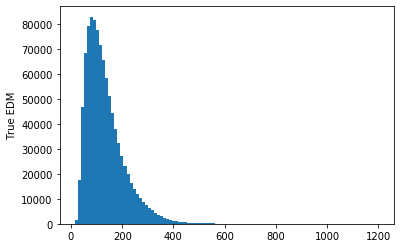

(133.594574 $\pm$ 74.754921) GeV


In [30]:
# compare prediction to true value
plt.hist(Y, bins=100)
plt.ylabel('True EDM')
plt.show()
print("(%f $\pm$ %f) GeV" %(np.mean(Y), np.sqrt(np.var(Y))))

# MAPE

In [40]:
# load the model
from keras.models import model_from_json
# read encoder
json_file = open("models/EMD_Dense_MAPE.json", 'r')
encoder_json = json_file.read()
json_file.close()
model = model_from_json(encoder_json)
model.load_weights("models/EMD_Dense_MAPE.h5")

In [42]:
model.compile(optimizer='adam', loss='mape', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 6, 1)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 6, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 6, 1)          6010      
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 6, 1)          4         
_________________________________________________________________
activation_1 (Activation)    (None, 10, 6, 1)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 6, 1)           505       
_________________________________________________________________
batch_normalization_3 (Batch (None, 5, 6, 1)           4         
__________

In [43]:
Yhat = model.predict(X)

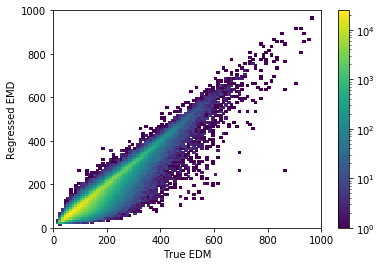

In [44]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
# compare prediction to true value
plt.hist2d(Y, Yhat[:,0], bins=100, range=[[0.,1000],[0.,1000]], norm=LogNorm())
plt.colorbar()
plt.ylabel('Regressed EMD')
plt.xlabel('True EDM')
plt.show()

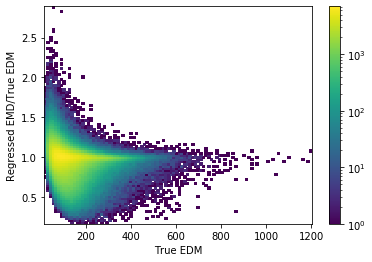

In [45]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
# compare prediction to true value
plt.hist2d(Y, Yhat[:,0]/Y, bins=100, norm=LogNorm())
plt.colorbar()
plt.ylabel('Regressed EMD/True EDM')
plt.xlabel('True EDM')
plt.show()

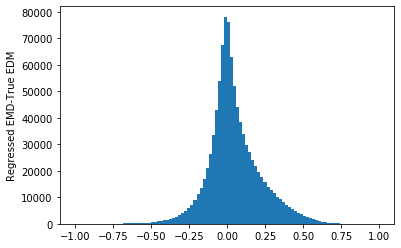

ABSOLUTE: (8.870861 $\pm$ 24.087114) GeV
RELATIVE: 0.047715 $\pm$ 0.172854


In [46]:
import math
# compare prediction to true value
plt.hist((Y-Yhat[:,0])/Y, bins=100, range=[-1., 1.])
plt.ylabel('Regressed EMD-True EDM')
plt.show()
print("ABSOLUTE: (%f $\pm$ %f) GeV" %(np.mean(Y-Yhat[:,0]), np.sqrt(np.var(Y-Yhat[:,0]))))
rel = (Y-Yhat[:,0])/Y
varRel = math.sqrt(np.var(rel))
print("RELATIVE: %f $\pm$ %f" %(np.mean(rel), varRel))

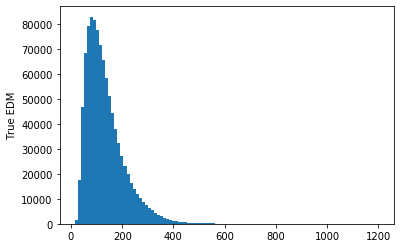

(133.594574 $\pm$ 74.754921) GeV


In [47]:
# compare prediction to true value
plt.hist(Y, bins=100)
plt.ylabel('True EDM')
plt.show()
print("(%f $\pm$ %f) GeV" %(np.mean(Y), np.sqrt(np.var(Y))))

# Asymmetric MAE

In [2]:
# load the model
from keras.models import model_from_json
# read encoder
json_file = open("models/EMD_Dense_MAE_Asymmetric.json", 'r')
encoder_json = json_file.read()
json_file.close()
model = model_from_json(encoder_json)
model.load_weights("models/EMD_Dense_MAE_Asymmetric.h5")

In [3]:
model.compile(optimizer='adam', loss='mape', metrics=['acc'])
model.summary()

W0726 22:00:43.159321 4615525824 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 6, 1)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 6, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 6, 1)          6010      
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 6, 1)          4         
_________________________________________________________________
activation_1 (Activation)    (None, 10, 6, 1)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 6, 1)           505       
_________________________________________________________________
batch_normalization_3 (Batch (None, 5, 6, 1)           4         
__________

In [8]:
Yhat = model.predict(X)

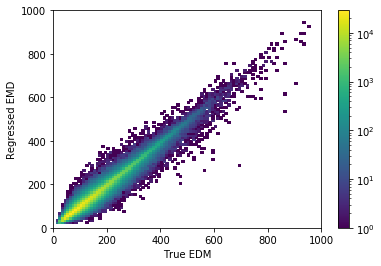

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
# compare prediction to true value
plt.hist2d(Y, Yhat[:,0], bins=100, range=[[0.,1000],[0.,1000]], norm=LogNorm())
plt.colorbar()
plt.ylabel('Regressed EMD')
plt.xlabel('True EDM')
plt.show()

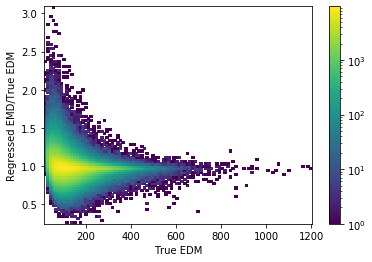

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
# compare prediction to true value
plt.hist2d(Y, Yhat[:,0]/Y, bins=100, norm=LogNorm())
plt.colorbar()
plt.ylabel('Regressed EMD/True EDM')
plt.xlabel('True EDM')
plt.show()

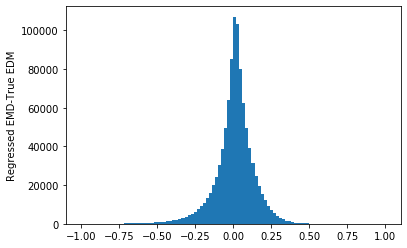

ABSOLUTE: (2.955375 $\pm$ 15.021564) GeV
RELATIVE: 0.007148 $\pm$ 0.130587


In [11]:
import math
# compare prediction to true value
plt.hist((Y-Yhat[:,0])/Y, bins=100, range=[-1., 1.])
plt.ylabel('Regressed EMD-True EDM')
plt.show()
print("ABSOLUTE: (%f $\pm$ %f) GeV" %(np.mean(Y-Yhat[:,0]), np.sqrt(np.var(Y-Yhat[:,0]))))
rel = (Y-Yhat[:,0])/Y
varRel = math.sqrt(np.var(rel))
print("RELATIVE: %f $\pm$ %f" %(np.mean(rel), varRel))

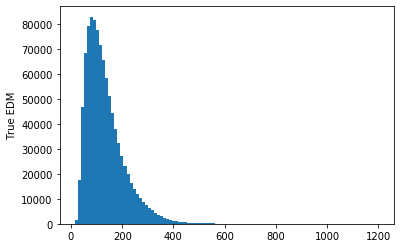

(133.594574 $\pm$ 74.754921) GeV


In [12]:
# compare prediction to true value
plt.hist(Y, bins=100)
plt.ylabel('True EDM')
plt.show()
print("(%f $\pm$ %f) GeV" %(np.mean(Y), np.sqrt(np.var(Y))))

# Asymmetric MAE with penalty=100

In [22]:
# load the model
from keras.models import model_from_json
# read encoder
json_file = open("models/EMD_Dense_MAE_AsymmetryLarge.json", 'r')
encoder_json = json_file.read()
json_file.close()
model = model_from_json(encoder_json)
model.load_weights("models/EMD_Dense_MAE_AsymmetryLarge.h5")

model.compile(optimizer='adam', loss='mape', metrics=['acc'])
model.summary()

Yhat = model.predict(X)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 6, 1)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 6, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 6, 1)          6010      
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 6, 1)          4         
_________________________________________________________________
activation_1 (Activation)    (None, 10, 6, 1)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 6, 1)           505       
_________________________________________________________________
batch_normalization_3 (Batch (None, 5, 6, 1)           4         
__________

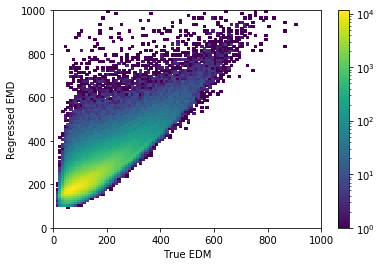

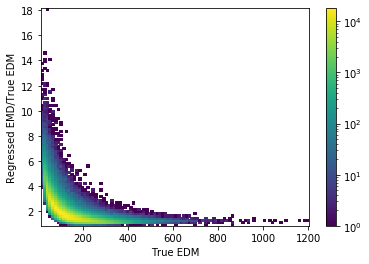

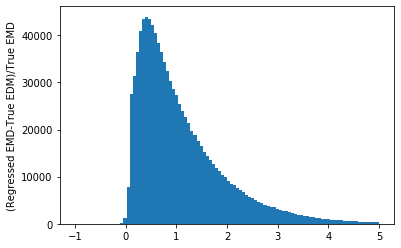

ABSOLUTE: (102.728172 $\pm$ 46.940735) GeV
RELATIVE: 1.106994 $\pm$ 0.907242


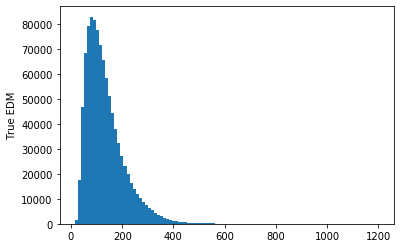

(133.594574 $\pm$ 74.754921) GeV


In [23]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
# compare prediction to true value
plt.hist2d(Y, Yhat[:,0], bins=100, range=[[0.,1000],[0.,1000]], norm=LogNorm())
plt.colorbar()
plt.ylabel('Regressed EMD')
plt.xlabel('True EDM')
plt.show()

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
# compare prediction to true value
plt.hist2d(Y, Yhat[:,0]/Y, bins=100, norm=LogNorm())
plt.colorbar()
plt.ylabel('Regressed EMD/True EDM')
plt.xlabel('True EDM')
plt.show()

import math
# compare prediction to true value
plt.hist((Yhat[:,0]-Y)/Y, bins=100, range=[-1., 5.])
plt.ylabel('(Regressed EMD-True EDM)/True EMD')
plt.show()
print("ABSOLUTE: (%f $\pm$ %f) GeV" %(np.mean(Yhat[:,0]-Y), np.sqrt(np.var(Y-Yhat[:,0]))))
rel = (Yhat[:,0]-Y)/Y
varRel = math.sqrt(np.var(rel))
print("RELATIVE: %f $\pm$ %f" %(np.mean(rel), varRel))

# compare prediction to true value
plt.hist(Y, bins=100)
plt.ylabel('True EDM')
plt.show()
print("(%f $\pm$ %f) GeV" %(np.mean(Y), np.sqrt(np.var(Y))))

# Asymmetric MAE with penalty=50

In [17]:
# load the model
from keras.models import model_from_json
# read encoder
json_file = open("models/EMD_Dense_MAE_AsymmetryLarge_50.json", 'r')
encoder_json = json_file.read()
json_file.close()
model = model_from_json(encoder_json)
model.load_weights("models/EMD_Dense_MAE_AsymmetryLarge_50.h5")

model.compile(optimizer='adam', loss='mape', metrics=['acc'])
model.summary()

Yhat = model.predict(X)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 6, 1)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 6, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 6, 1)          6010      
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 6, 1)          4         
_________________________________________________________________
activation_1 (Activation)    (None, 10, 6, 1)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 6, 1)           505       
_________________________________________________________________
batch_normalization_3 (Batch (None, 5, 6, 1)           4         
__________

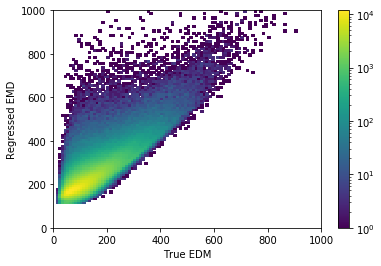

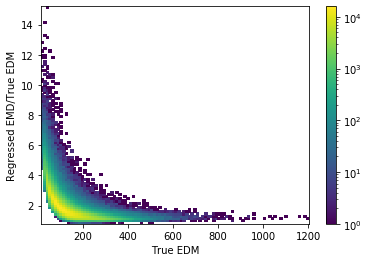

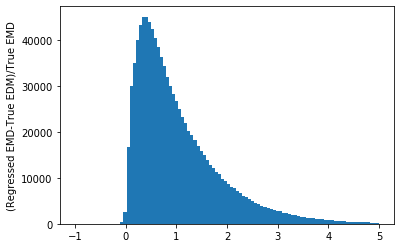

ABSOLUTE: (96.828194 $\pm$ 46.518017) GeV
RELATIVE: 1.049238 $\pm$ 0.871551


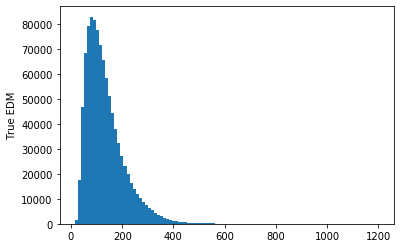

(133.594574 $\pm$ 74.754921) GeV


In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
# compare prediction to true value
plt.hist2d(Y, Yhat[:,0], bins=100, range=[[0.,1000],[0.,1000]], norm=LogNorm())
plt.colorbar()
plt.ylabel('Regressed EMD')
plt.xlabel('True EDM')
plt.show()

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
# compare prediction to true value
plt.hist2d(Y, Yhat[:,0]/Y, bins=100, norm=LogNorm())
plt.colorbar()
plt.ylabel('Regressed EMD/True EDM')
plt.xlabel('True EDM')
plt.show()

import math
# compare prediction to true value
plt.hist((Yhat[:,0]-Y)/Y, bins=100, range=[-1., 5.])
plt.ylabel('(Regressed EMD-True EDM)/True EMD')
plt.show()
print("ABSOLUTE: (%f $\pm$ %f) GeV" %(np.mean(Yhat[:,0]-Y), np.sqrt(np.var(Y-Yhat[:,0]))))
rel = (Yhat[:,0]-Y)/Y
varRel = math.sqrt(np.var(rel))
print("RELATIVE: %f $\pm$ %f" %(np.mean(rel), varRel))

# compare prediction to true value
plt.hist(Y, bins=100)
plt.ylabel('True EDM')
plt.show()
print("(%f $\pm$ %f) GeV" %(np.mean(Y), np.sqrt(np.var(Y))))

# Asymmetric MAE with penalty=10

In [4]:
# load the model
from keras.models import model_from_json
# read encoder
json_file = open("models/EMD_Dense_MAE_AsymmetryLarge_10.json", 'r')
encoder_json = json_file.read()
json_file.close()
model = model_from_json(encoder_json)
model.load_weights("models/EMD_Dense_MAE_AsymmetryLarge_10.h5")

model.compile(optimizer='adam', loss='mape', metrics=['acc'])
model.summary()

Yhat = model.predict(X)

Using TensorFlow backend.
W0727 11:49:14.827538 4537976256 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0727 11:49:14.859516 4537976256 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0727 11:49:14.860401 4537976256 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0727 11:49:14.861032 4537976256 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0727 11:49:14.861699 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 6, 1)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 6, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 6, 1)          6010      
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 6, 1)          4         
_________________________________________________________________
activation_1 (Activation)    (None, 10, 6, 1)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 6, 1)           505       
_________________________________________________________________
batch_normalization_3 (Batch (None, 5, 6, 1)           4         
__________

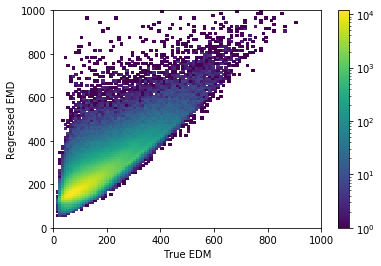

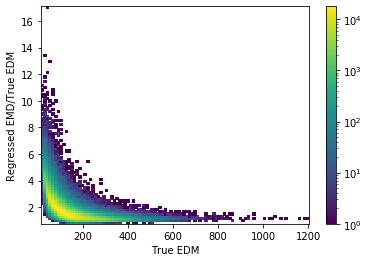

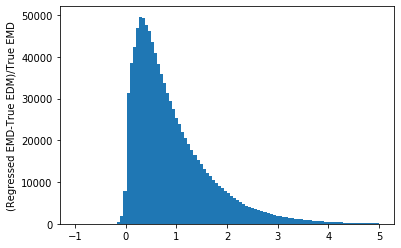

ABSOLUTE: (83.689445 $\pm$ 43.495651) GeV
RELATIVE: 0.914349 $\pm$ 0.781675


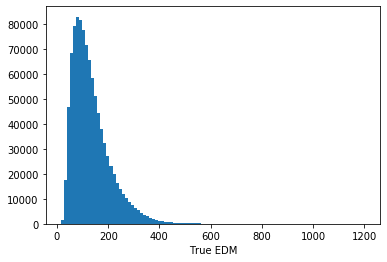

(133.594574 $\pm$ 74.754921) GeV


In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
# compare prediction to true value
plt.hist2d(Y, Yhat[:,0], bins=100, range=[[0.,1000],[0.,1000]], norm=LogNorm())
plt.colorbar()
plt.ylabel('Regressed EMD')
plt.xlabel('True EDM')
plt.show()

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
# compare prediction to true value
plt.hist2d(Y, Yhat[:,0]/Y, bins=100, norm=LogNorm())
plt.colorbar()
plt.ylabel('Regressed EMD/True EDM')
plt.xlabel('True EDM')
plt.show()

import math
# compare prediction to true value
plt.hist((Yhat[:,0]-Y)/Y, bins=100, range=[-1., 5.])
plt.ylabel('(Regressed EMD-True EDM)/True EMD')
plt.show()
print("ABSOLUTE: (%f $\pm$ %f) GeV" %(np.mean(Yhat[:,0]-Y), np.sqrt(np.var(Y-Yhat[:,0]))))
rel = (Yhat[:,0]-Y)/Y
varRel = math.sqrt(np.var(rel))
print("RELATIVE: %f $\pm$ %f" %(np.mean(rel), varRel))

# compare prediction to true value
plt.hist(Y, bins=100)
plt.xlabel('True EDM')
plt.show()
print("(%f $\pm$ %f) GeV" %(np.mean(Y), np.sqrt(np.var(Y))))

# Asymmetric MAE with penalty=1

In [7]:
# load the model
from keras.models import model_from_json
# read encoder
json_file = open("models/EMD_Dense_MAE_AsymmetryLarge_1.json", 'r')
encoder_json = json_file.read()
json_file.close()
model = model_from_json(encoder_json)
model.load_weights("models/EMD_Dense_MAE_AsymmetryLarge_1.h5")

model.compile(optimizer='adam', loss='mape', metrics=['acc'])
model.summary()

Yhat = model.predict(X)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 6, 1)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 6, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 6, 1)          6010      
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 6, 1)          4         
_________________________________________________________________
activation_1 (Activation)    (None, 10, 6, 1)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 6, 1)           505       
_________________________________________________________________
batch_normalization_3 (Batch (None, 5, 6, 1)           4         
__________

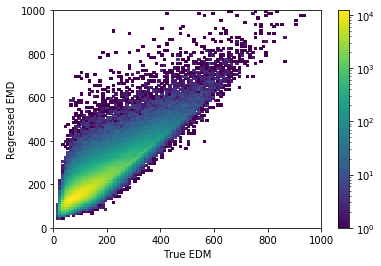

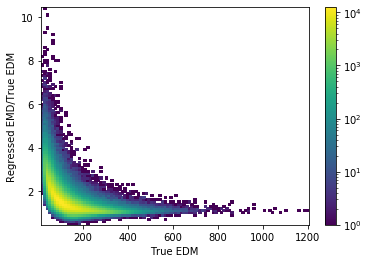

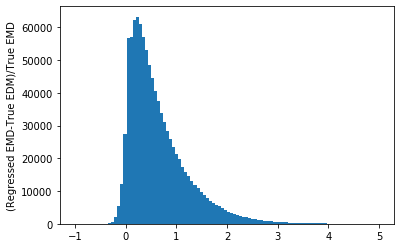

ABSOLUTE: (58.589905 $\pm$ 38.070789) GeV
RELATIVE: 0.647068 $\pm$ 0.594578


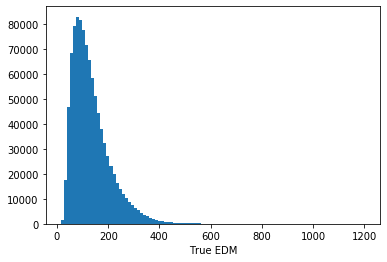

(133.594574 $\pm$ 74.754921) GeV


In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
# compare prediction to true value
plt.hist2d(Y, Yhat[:,0], bins=100, range=[[0.,1000],[0.,1000]], norm=LogNorm())
plt.colorbar()
plt.ylabel('Regressed EMD')
plt.xlabel('True EDM')
plt.show()

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
# compare prediction to true value
plt.hist2d(Y, Yhat[:,0]/Y, bins=100, norm=LogNorm())
plt.colorbar()
plt.ylabel('Regressed EMD/True EDM')
plt.xlabel('True EDM')
plt.show()

import math
# compare prediction to true value
plt.hist((Yhat[:,0]-Y)/Y, bins=100, range=[-1., 5.])
plt.ylabel('(Regressed EMD-True EDM)/True EMD')
plt.show()
print("ABSOLUTE: (%f $\pm$ %f) GeV" %(np.mean(Yhat[:,0]-Y), np.sqrt(np.var(Y-Yhat[:,0]))))
rel = (Yhat[:,0]-Y)/Y
varRel = math.sqrt(np.var(rel))
print("RELATIVE: %f $\pm$ %f" %(np.mean(rel), varRel))

# compare prediction to true value
plt.hist(Y, bins=100)
plt.xlabel('True EDM')
plt.show()
print("(%f $\pm$ %f) GeV" %(np.mean(Y), np.sqrt(np.var(Y))))

# Asymmetric MAE with penalty=0.1

In [10]:
# load the model
from keras.models import model_from_json
# read encoder
json_file = open("models/EMD_Dense_MAE_AsymmetryLarge_0.1.json", 'r')
encoder_json = json_file.read()
json_file.close()
model = model_from_json(encoder_json)
model.load_weights("models/EMD_Dense_MAE_AsymmetryLarge_0.1.h5")

model.compile(optimizer='adam', loss='mape', metrics=['acc'])
model.summary()

Yhat = model.predict(X)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 6, 1)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 6, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 6, 1)          6010      
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 6, 1)          4         
_________________________________________________________________
activation_1 (Activation)    (None, 10, 6, 1)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 6, 1)           505       
_________________________________________________________________
batch_normalization_3 (Batch (None, 5, 6, 1)           4         
__________

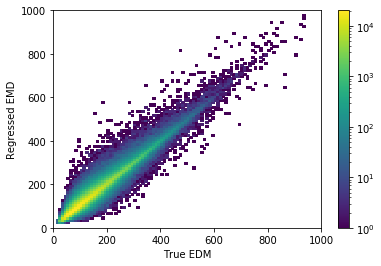

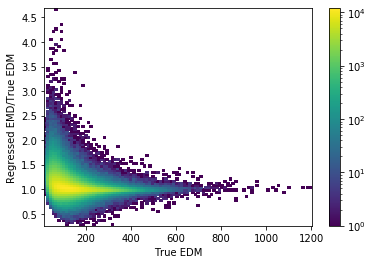

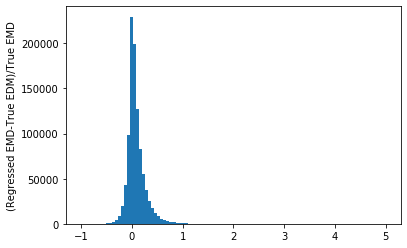

ABSOLUTE: (6.794277 $\pm$ 18.139107) GeV
RELATIVE: 0.079871 $\pm$ 0.175535


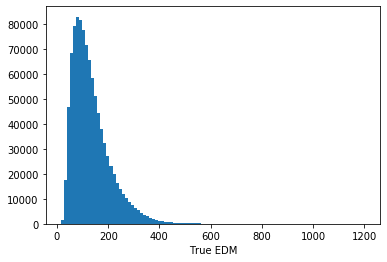

(133.594574 $\pm$ 74.754921) GeV


In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
# compare prediction to true value
plt.hist2d(Y, Yhat[:,0], bins=100, range=[[0.,1000],[0.,1000]], norm=LogNorm())
plt.colorbar()
plt.ylabel('Regressed EMD')
plt.xlabel('True EDM')
plt.show()

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
# compare prediction to true value
plt.hist2d(Y, Yhat[:,0]/Y, bins=100, norm=LogNorm())
plt.colorbar()
plt.ylabel('Regressed EMD/True EDM')
plt.xlabel('True EDM')
plt.show()

import math
# compare prediction to true value
plt.hist((Yhat[:,0]-Y)/Y, bins=100, range=[-1., 5.])
plt.ylabel('(Regressed EMD-True EDM)/True EMD')
plt.show()
print("ABSOLUTE: (%f $\pm$ %f) GeV" %(np.mean(Yhat[:,0]-Y), np.sqrt(np.var(Y-Yhat[:,0]))))
rel = (Yhat[:,0]-Y)/Y
varRel = math.sqrt(np.var(rel))
print("RELATIVE: %f $\pm$ %f" %(np.mean(rel), varRel))

# compare prediction to true value
plt.hist(Y, bins=100)
plt.xlabel('True EDM')
plt.show()
print("(%f $\pm$ %f) GeV" %(np.mean(Y), np.sqrt(np.var(Y))))